In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder


# 데이터 불러오기
wine = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/winequality-white.csv', sep=';')

# X: 특징 데이터
X = wine.drop('quality', axis=1)

# y: 타겟(라벨)
y = wine['quality']



from tensorflow.keras import layers, models

scaler = StandardScaler()
X = scaler.fit_transform(X)

Y = pd.get_dummies(y)
X = X


In [2]:
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [3]:
model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(Y.shape[1], activation="softmax")   # 클래스 수 맞춤
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",   # one-hot이면 categorical_crossentropy
    metrics=["accuracy"]
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3732 - loss: 1.6029 - val_accuracy: 0.5242 - val_loss: 1.1564
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5168 - loss: 1.1604 - val_accuracy: 0.5561 - val_loss: 1.0813
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5343 - loss: 1.1315 - val_accuracy: 0.5523 - val_loss: 1.0617
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5553 - loss: 1.0850 - val_accuracy: 0.5383 - val_loss: 1.0502
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5476 - loss: 1.0903 - val_accuracy: 0.5561 - val_loss: 1.0398
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5563 - loss: 1.0362 - val_accuracy: 0.5472 - val_loss: 1.0421
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5610 - loss: 1.0372 - val_accuracy: 0.5497 - val_loss: 1.0292
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5755 - loss: 1.0332 - val_accuracy: 0.

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


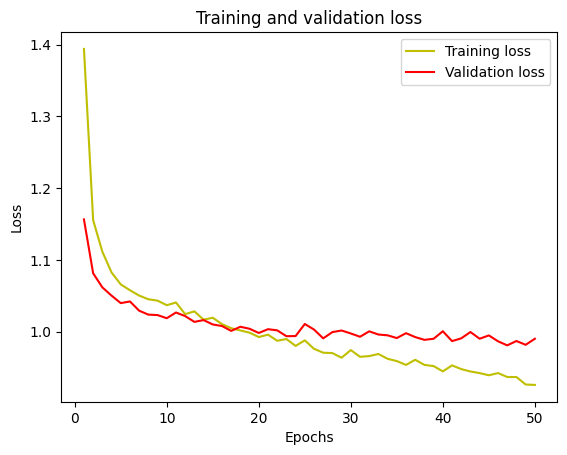

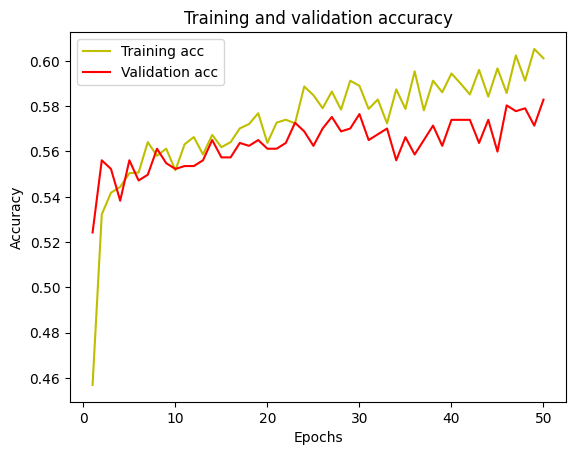

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.80      0.16      0.26        51
           2       0.59      0.57      0.58       295
           3       0.52      0.69      0.59       409
           4       0.53      0.41      0.46       183
           5       0.00      0.00      0.00        33

    accuracy                           0.54       980
   macro avg       0.41      0.30      0.32       980
weighted avg       0.54      0.54      0.52       980

[[  0   0   5   3   1   0]
 [  0   8  29  13   1   0]
 [  0   2 169 121   3   0]
 [  0   0  77 282  49   1]
 [  0   0   7 101  75   0]
 [  0   0   0  20  13   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [5]:


# 예측
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

# 학습 곡선 시각화
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 성능 평가
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))


In [6]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.80      0.16      0.26        51
           2       0.59      0.57      0.58       295
           3       0.52      0.69      0.59       409
           4       0.53      0.41      0.46       183
           5       0.00      0.00      0.00        33

    accuracy                           0.54       980
   macro avg       0.41      0.30      0.32       980
weighted avg       0.54      0.54      0.52       980

[[  0   0   5   3   1   0]
 [  0   8  29  13   1   0]
 [  0   2 169 121   3   0]
 [  0   0  77 282  49   1]
 [  0   0   7 101  75   0]
 [  0   0   0  20  13   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
